In [2]:
import pandas as pd
import numpy as np
data_train=pd.read_csv('youhua/T-R-train.csv')
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


In [4]:
X_train=data_train.loc[:,'T']
y_train=data_train.loc[:,'rate']

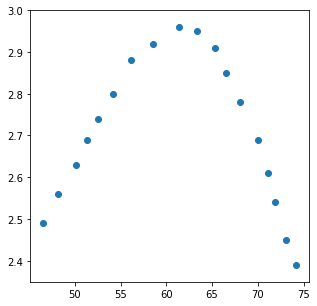

In [5]:
from matplotlib import pyplot as plt
fig1=plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)

In [7]:
X_train.shape

(18,)

In [9]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
X_train=np.array(X_train).reshape(-1,1)
lr1.fit(X_train,y_train)
X_train.shape

(18, 1)

In [10]:
data_test=pd.read_csv('youhua/T-R-test.csv')
data_test.head()

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618


In [13]:
X_test=data_test.loc[:,'T']
y_test=data_test.loc[:,'rate']
X_test=np.array(X_test).reshape(-1,1)

In [15]:
y_train_predict=lr1.predict(X_train)
y_test_predict=lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,y_train_predict)
r2_test=r2_score(y_test,y_test_predict)

In [16]:
r2_train

0.016665703886981964

In [17]:
r2_test

-0.7583363437351314

In [19]:
X_range=np.linspace(40,90,300).reshape(-1,1)
y_range_predict=lr1.predict(X_range)

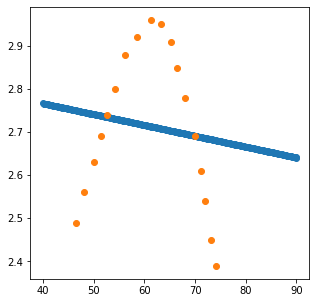

In [23]:
fig2=plt.figure(figsize=(5,5))
plt.scatter(X_range,y_range_predict)
plt.scatter(X_train,y_train)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly2=PolynomialFeatures(degree=2)
X_2_train=poly2.fit_transform(X_train)
X_2_test=poly2.transform(X_test)
X_2_test

array([[1.00000000e+00, 4.53763441e+01, 2.05901260e+03],
       [1.00000000e+00, 5.21863799e+01, 2.72341825e+03],
       [1.00000000e+00, 6.18637993e+01, 3.82712966e+03],
       [1.00000000e+00, 7.31541219e+01, 5.35152555e+03],
       [1.00000000e+00, 7.88888889e+01, 6.22345679e+03],
       [1.00000000e+00, 8.24731183e+01, 6.80181524e+03],
       [1.00000000e+00, 4.30465950e+01, 1.85300934e+03]])

In [32]:
lr2=LinearRegression()
lr2.fit(X_2_train,y_train)
y_2_train_predict=lr2.predict(X_2_train)
y_2_test_predict=lr2.predict(X_2_test)
r2_2_train=r2_score(y_train,y_2_train_predict)
r2_2_test=r2_score(y_test,y_2_test_predict)

In [33]:
r2_2_train

0.970051540068943

In [34]:
r2_2_test

0.996395455646867

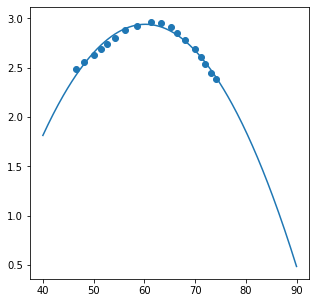

In [41]:
X_2_range=np.linspace(40,90,300).reshape(-1,1)
X_2_range=poly2.transform(X_2_range)
y_2_range_predict=lr2.predict(X_2_range)

fig2=plt.figure(figsize=(5,5))
plt.plot(X_range,y_2_range_predict)
plt.scatter(X_train,y_train)